<a href="https://colab.research.google.com/github/HindFaris/urban_security/blob/time_series_visualisation/Analyse_Insecurite_Urbaine_Normalized.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Understanding

Import librairies


In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

Load data

In [2]:
file_path = 'full_dataset_normalized_2.csv'
data = pd.read_csv(file_path)

<ipython-input-2-5f8b298d359c>:2: DtypeWarning: Columns (1) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


In [3]:
data.head()

,Date,code_dep,Homicides,Vols,Cambriolages à domicile ou violaiton de domicile,Crimes ou délits sexuelles,Infractions liées aux stupéfiants,Dégradations ou destructions de biens volontaires,Violences,Falsifications et contrefaçons,...,Crimes ou délits sexuelles_per_population,Infractions liées aux stupéfiants_per_population,Dégradations ou destructions de biens volontaires_per_population,Violences_per_population,Falsifications et contrefaçons_per_population,Délits Économiques et Financiers_per_population,Irégularités de Main-d'oeuvre_per_population,effectif_total_police_national_per_population,Chomage_per_population,density
0,2020-12-31,France_Métro,334,100149,19220,6233,15373,18688,30279,39799,...,0.000095,0.000236,0.000286,0.000464,0.000610,0.000020,0.000013,NaN,0.093126,101.380945
1,2020-11-30,France_Métro,287,86852,12762,6559,21340,18284,31860,39160,...,0.000100,0.000327,0.000280,0.000488,0.000600,0.000025,0.000016,NaN,0.093189,101.380945
2,2020-10-31,France_Métro,308,117119,20116,6406,21422,20370,32536,39578,...,0.000098,0.000328,0.000312,0.000498,0.000606,0.000027,0.000015,NaN,0.093251,101.380945
3,2020-09-30,France_Métro,343,125419,19515,6814,19659,21363,35031,39789,...,0.000104,0.000301,0.000327,0.000537,0.000610,0.000022,0.000016,NaN,0.093313,101.380945
4,2020-08-31,France_Métro,329,123620,20889,6327,12379,21848,33364,38851,...,0.000097,0.000190,0.000335,0.000511,0.000595,0.000017,0.000010,NaN,0.092824,101.380945


In [4]:
# Caster le code dep en string
data['code_dep'] = data['code_dep'].astype(str)

Choix des colonnes a traiter

In [5]:
column_names = data.columns
print(column_names)


Index(['Date', 'code_dep', 'Homicides', 'Vols',
       'Cambriolages à domicile ou violaiton de domicile',
       'Crimes ou délits sexuelles', 'Infractions liées aux stupéfiants',
       'Dégradations ou destructions de biens volontaires', 'Violences',
       'Falsifications et contrefaçons', 'Délits Économiques et Financiers',
       'Irégularités de Main-d'oeuvre', 'annee', 'Population', 'Chomage',
       'Taux de pauvreté-moins de 30', 'Taux de pauvreté-30 à 39 ans',
       'Taux de pauvreté-40 à 49 ans', 'Taux de pauvreté-50 à 59 ans',
       'Taux de pauvreté-60 à 74 ans', 'Taux de pauvreté-75 ans ou plus',
       'Median_salaire', 'Taux de pauvreté-Ensemble', 'Bac_g_réussite_%',
       'Bac_t_réussite_%', 'Bac_p_réussite_%', 'Bac_g_%', 'Bac_t_%', 'Bac_p_%',
       'non_peu_diplômés_non_scolarisée_<15ans', 'Superficie\r\n(km2)',
       'effectif_total_police_national', 'Homicides_per_population',
       'Vols_per_population',
       'Cambriolages à domicile ou violaiton de domici

In [6]:
#les données brutes
df = data[['Date', 'annee', 'code_dep',
                      'Chomage',  'effectif_total_police_national',
                      'Homicides', 'Vols',
                      'Cambriolages à domicile ou violaiton de domicile',
                      'Crimes ou délits sexuelles', 'Infractions liées aux stupéfiants',
                      'Dégradations ou destructions de biens volontaires', 'Violences',
                      'Falsifications et contrefaçons', 'Délits Économiques et Financiers',
                      'Irégularités de Main-d\'oeuvre']]


In [7]:
# Crimes et delits
crimes_delits = [ 'Homicides', 'Vols',
                      'Cambriolages à domicile ou violaiton de domicile',
                      'Crimes ou délits sexuelles', 'Infractions liées aux stupéfiants',
                      'Dégradations ou destructions de biens volontaires', 'Violences',
                      'Falsifications et contrefaçons', 'Délits Économiques et Financiers',
                      'Irégularités de Main-d\'oeuvre']

In [8]:
df['Total_Delinquance'] = df[crimes_delits].sum(axis=1)


<ipython-input-8-a5b35a99e01c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Total_Delinquance'] = df[crimes_delits].sum(axis=1)


Vu que les variables de l'ensemble de données présentent des ordres de grandeur distincts, nous utiliserons les données normalisées. Nous focaliserons notre analyse sur les crimes, le taux de chômage et la présence policière.


In [9]:
#les données normalisées
df_normalized = data[['Date', 'annee', 'code_dep', 'density',
       'Homicides_per_population',
       'Vols_per_population',
       'Cambriolages à domicile ou violaiton de domicile_per_population',
       'Crimes ou délits sexuelles_per_population',
       'Infractions liées aux stupéfiants_per_population',
       'Dégradations ou destructions de biens volontaires_per_population',
       'Violences_per_population',
       'Falsifications et contrefaçons_per_population',
       'Délits Économiques et Financiers_per_population',
       'Irégularités de Main-d\'oeuvre_per_population',
       'effectif_total_police_national_per_population',
       'Chomage_per_population']]

In [10]:
# Crimes et delits normalisee
crimes_delits_normalized = ['Homicides_per_population',
       'Vols_per_population',
       'Cambriolages à domicile ou violaiton de domicile_per_population',
       'Crimes ou délits sexuelles_per_population',
       'Infractions liées aux stupéfiants_per_population',
       'Dégradations ou destructions de biens volontaires_per_population',
       'Violences_per_population',
       'Falsifications et contrefaçons_per_population',
       'Délits Économiques et Financiers_per_population',
       'Irégularités de Main-d\'oeuvre_per_population']

#calcule la somme des valeurs dans chaque ligne pour les colonnes spécifiées dans crimes_delits.
df_normalized['Total_Delinquance_per_population'] = df_normalized[crimes_delits_normalized].sum(axis=1)


<ipython-input-10-91d3568e6d38>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_normalized['Total_Delinquance_per_population'] = df_normalized[crimes_delits_normalized].sum(axis=1)


In [63]:
crimes_delits_normalized_echelle= [
       'Cambriolages à domicile ou violaiton de domicile_per_population',
       'Infractions liées aux stupéfiants_per_population',
       'Dégradations ou destructions de biens volontaires_per_population',
       'Violences_per_population',
       'Falsifications et contrefaçons_per_population']

In [11]:
print("La taille de la dataframe:", df_normalized.shape)

La taille de la dataframe: (26328, 17)


In [12]:
 df_normalized

,Date,annee,code_dep,density,Homicides_per_population,Vols_per_population,Cambriolages à domicile ou violaiton de domicile_per_population,Crimes ou délits sexuelles_per_population,Infractions liées aux stupéfiants_per_population,Dégradations ou destructions de biens volontaires_per_population,Violences_per_population,Falsifications et contrefaçons_per_population,Délits Économiques et Financiers_per_population,Irégularités de Main-d'oeuvre_per_population,effectif_total_police_national_per_population,Chomage_per_population,Total_Delinquance_per_population
0,2020-12-31,2020,France_Métro,101.380945,0.000005,0.001534,0.000294,0.000095,0.000236,0.000286,0.000464,0.000610,0.000020,0.000013,NaN,0.093126,0.003558
1,2020-11-30,2020,France_Métro,101.380945,0.000004,0.001331,0.000196,0.000100,0.000327,0.000280,0.000488,0.000600,0.000025,0.000016,NaN,0.093189,0.003367
2,2020-10-31,2020,France_Métro,101.380945,0.000005,0.001794,0.000308,0.000098,0.000328,0.000312,0.000498,0.000606,0.000027,0.000015,NaN,0.093251,0.003993
3,2020-09-30,2020,France_Métro,101.380945,0.000005,0.001922,0.000299,0.000104,0.000301,0.000327,0.000537,0.000610,0.000022,0.000016,NaN,0.093313,0.004143
4,2020-08-31,2020,France_Métro,101.380945,0.000005,0.001894,0.000320,0.000097,0.000190,0.000335,0.000511,0.000595,0.000017,0.000010,NaN,0.092824,0.003974
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
26323,2006-05-31,2006,974,312.322563,0.000006,0.001637,0.000256,0.000065,0.000096,0.000269,0.000307,0.000396,0.000006,0.000008,NaN,0.116430,0.003046
26324,2006-04-30,2006,974,312.322563,0.000009,0.001666,0.000244,0.000047,0.000127,0.000275,0.000307,0.000155,0.000005,0.000022,NaN,0.118756,0.002857
26325,2006-03-31,2006,974,312.322563,0.000008,0.001922,0.000215,0.000068,0.000113,0.000269,0.000382,0.000156,0.000006,0.000014,NaN,0.121131,0.003152
26326,2006-02-28,2006,974,312.322563,0.000001,0.001703,0.000293,0.000050,0.000109,0.000244,0.000303,0.000116,0.000003,0.000019,NaN,0.121131,0.002842


In [46]:
# Supprimer les lignes où l'année est égale à 2020 parce qu on a pas tous les mois donc les donnes sont pas ajustees
df_normalized = df_normalized.drop(df_normalized[df_normalized['annee'] == 2020].index)
# Convertir la colonne 'Date' en datetime
df['Date'] = pd.to_datetime(df['Date'])



<ipython-input-46-ba31b2bc5f8a>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = pd.to_datetime(df['Date'])


# Crimes et Delits

**Analyse temporelle**

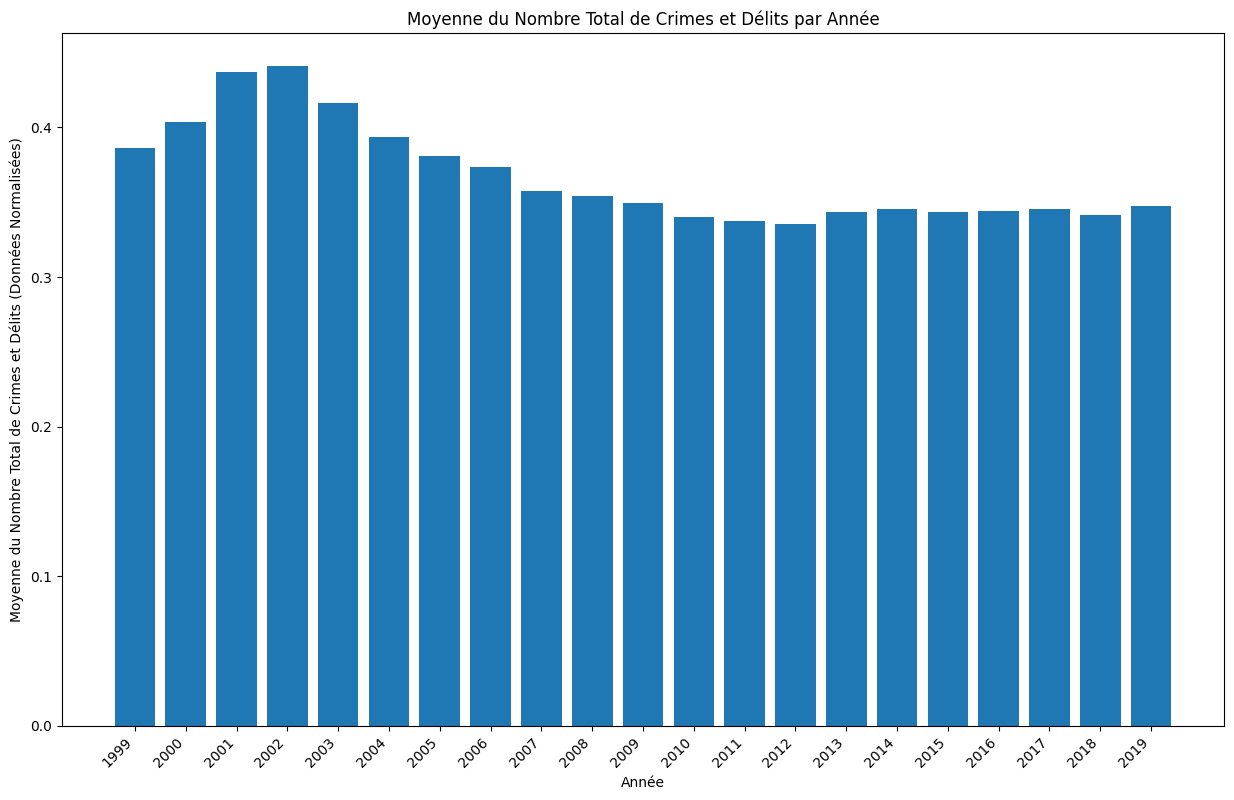

In [47]:
# Calculer la moyenne du nombre total de crimes et délits pour chaque année
moyenne_par_annee = df_normalized.groupby('annee')['Total_Delinquance_per_population'].mean()

# Convertir les moyennes en pourcentage en les multipliant par 100
moyenne_par_annee_en_pourcentage = moyenne_par_annee * 100

# Créer le graphique en barres pour visualiser la moyenne du nombre total de crimes et délits par année en pourcentage
plt.figure(figsize=(15, 9))
plt.bar(moyenne_par_annee.index, moyenne_par_annee_en_pourcentage, color='#1f77b4')
plt.title('Moyenne du Nombre Total de Crimes et Délits par Année')
plt.xlabel('Année')
plt.ylabel('Moyenne du Nombre Total de Crimes et Délits (Données Normalisées)')
plt.xticks(annees, rotation=45, ha='right')  # Utiliser toutes les années sur l'axe x
plt.xticks(rotation=45, ha='right')

plt.show()


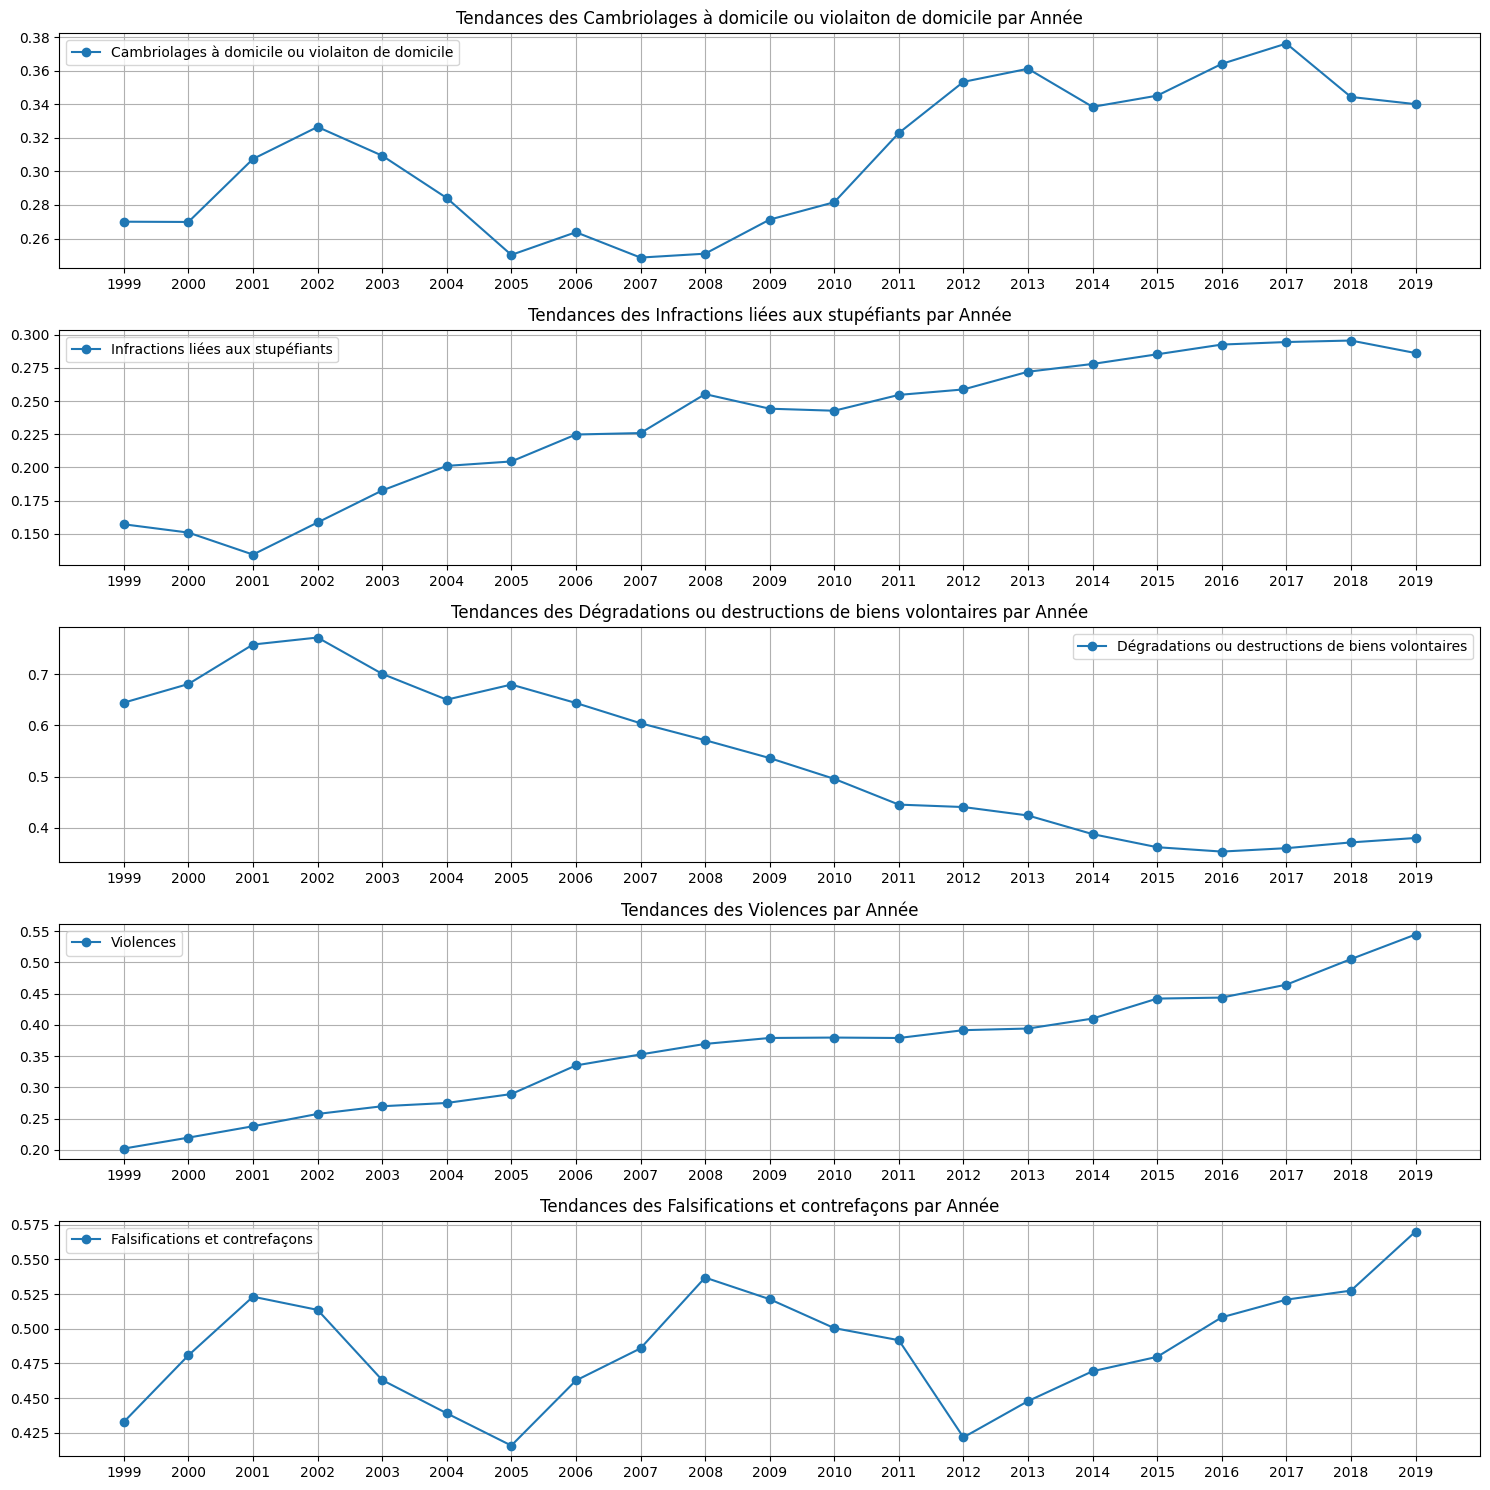

In [64]:
# Récupérer les valeurs uniques de l'année
annees_unique = df_normalized['annee'].unique()

# Configuration de la taille du graphique
fig, axes = plt.subplots(nrows=len(crimes_delits_normalized_echelle), ncols=1, figsize=(15, 3*len(crimes_delits_normalized_echelle)))

# Boucle pour générer un sous-plot pour chaque type de crime
for i, crime_type in enumerate(crimes_delits_normalized_echelle):
    # Regrouper les données par année et calculer la somme pour chaque type de crime
    total_crime_by_year = df_normalized.groupby('annee')[crime_type].sum()

    # Plot en ligne pour chaque type de crime dans le sous-plot correspondant
    axes[i].plot(total_crime_by_year.index, total_crime_by_year, marker='o', label=crime_type.replace('_per_population', ''))

    # Personnaliser le sous-plot
    axes[i].set_title(f'Tendances des {crime_type.replace("_per_population", "")} par Année')
    axes[i].legend()
    axes[i].grid(True)

    # Modifier les étiquettes de l'axe x pour afficher les années sous forme d'entiers
    axes[i].set_xticks(annees_unique)
    axes[i].set_xticklabels([int(annee) for annee in annees_unique])

# Ajuster l'espacement entre les sous-plots
plt.tight_layout()

# Afficher les sous-plots
plt.show()


Les types de délits n'évoluent pas de la même manière en France. Les tendances de violonces ont augmenté de manière significative, tandis que les Dégradations ou destructions de biens volontaires ont diminué.

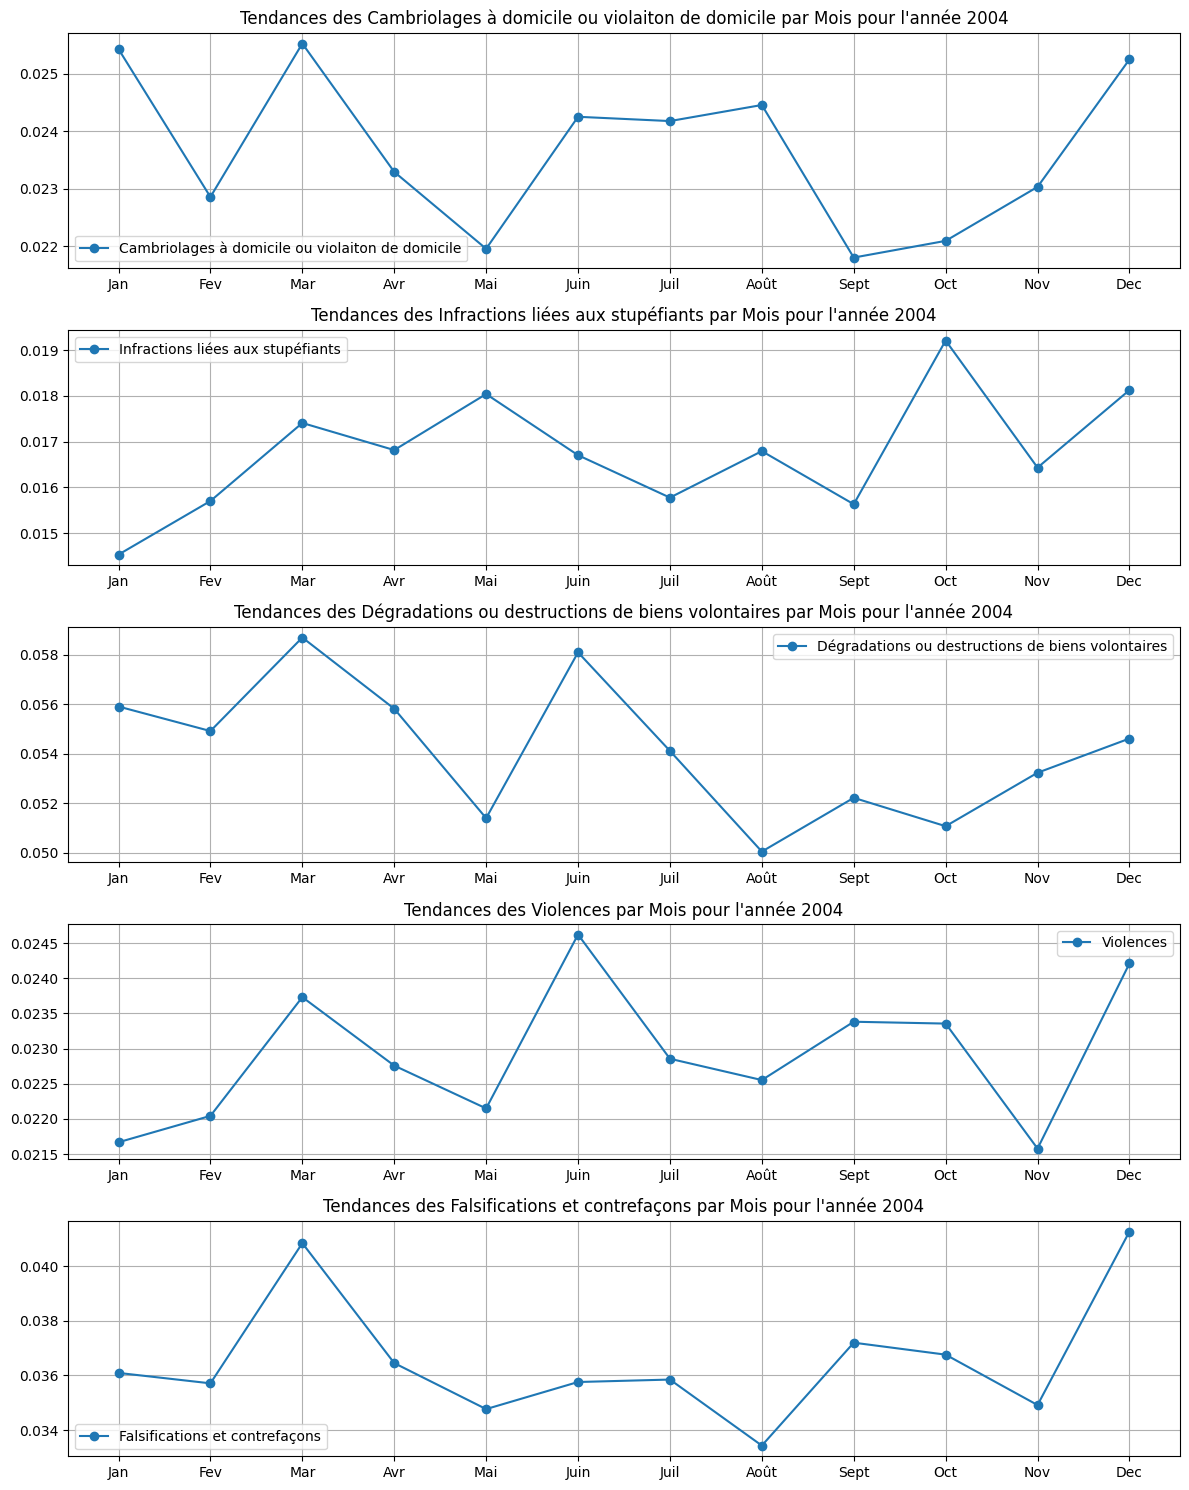

In [65]:
# Ajouter une colonne 'mois' contenant le mois de chaque date
df_normalized['mois'] = df_normalized['Date'].dt.month

# Sélectionner une année spécifique (par exemple 1999)
annee_selectionnee = 2004

# Filtrer les données pour l'année sélectionnée
df_annee_selectionnee = df_normalized[df_normalized['annee'] == annee_selectionnee]


# Configuration de la taille du graphique
fig, axes = plt.subplots(nrows=len(crimes_delits_normalized_echelle), ncols=1, figsize=(12, 3*len(crimes_delits_normalized_echelle)))

# Boucle pour générer un sous-plot pour chaque type de crime
for i, crime_type in enumerate(crimes_delits_normalized_echelle):
    # Regrouper les données par mois et calculer la somme pour chaque type de crime
    total_crime_by_month = df_annee_selectionnee.groupby('mois')[crime_type].sum()

    # Plot en ligne pour chaque type de crime dans le sous-plot correspondant
    axes[i].plot(total_crime_by_month.index, total_crime_by_month, marker='o', label=crime_type.replace('_per_population', ''))

    # Personnaliser le sous-plot
    axes[i].set_title(f'Tendances des {crime_type.replace("_per_population", "")} par Mois pour l\'année {annee_selectionnee}')
    axes[i].legend()
    axes[i].grid(True)

    # Modifier les étiquettes de l'axe x pour afficher les mois sous forme d'entiers
    axes[i].set_xticks(range(1, 13))
    axes[i].set_xticklabels(['Jan', 'Fev', 'Mar', 'Avr', 'Mai', 'Juin', 'Juil', 'Août', 'Sept', 'Oct', 'Nov', 'Dec'])

# Ajuster l'espacement entre les sous-plots
plt.tight_layout()

# Afficher les sous-plots
plt.show()



La figure montre une augmentation du nombre de delits et de crimes pendant les mois d'été. Cette augmentation peut s'expliquer par plusieurs facteurs, tels que les vacances scolaires, les départs en vacances etc.

**Analyse Géographique**

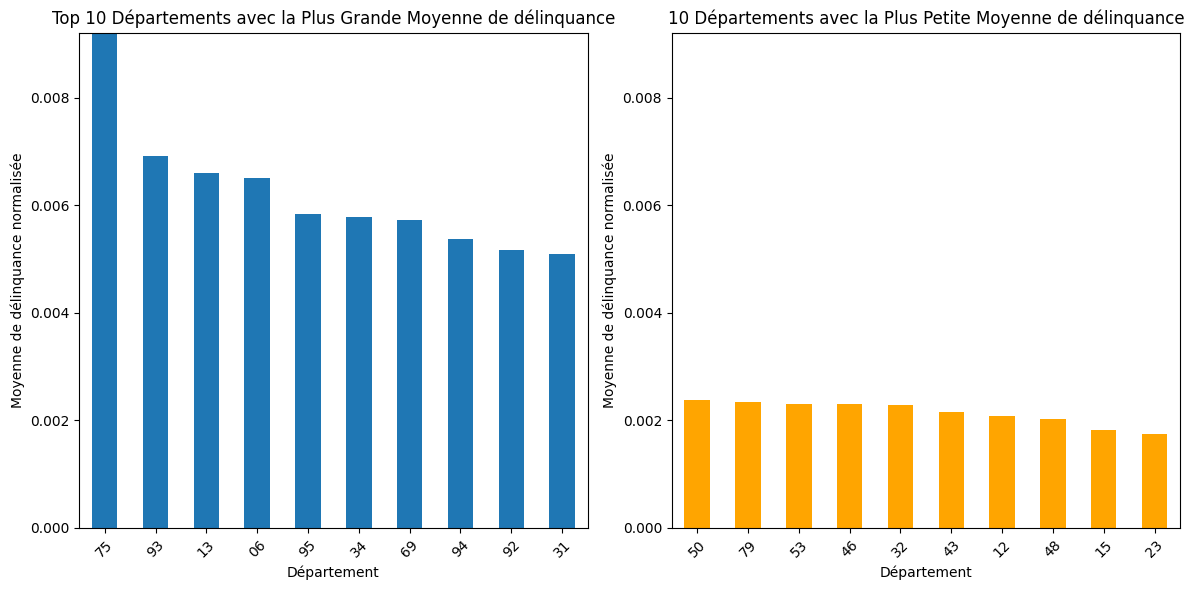

In [70]:
# Filtrer les données pour exclure le département 'France_Métro' si nécessaire
df_filtered = df_normalized[df_normalized['code_dep'] != 'France_Métro']

# Calculer la moyenne des crimes par département
average_crime_by_dept = df_filtered.groupby('code_dep')['Total_Delinquance_per_population'].mean()

# Trier les départements par leur moyenne de délinquance
average_crime_sorted = average_crime_by_dept.sort_values(ascending=False)

# Sélectionner les 10 premiers et les 10 derniers départements
top_10_dept = average_crime_sorted.head(10)
bottom_10_dept = average_crime_sorted.tail(10)

# Trouver l'échelle maximale pour les deux ensembles de données pour les utiliser sur les deux graphiques
max_scale = max(top_10_dept.max(), bottom_10_dept.max())

# Tracer les diagrammes à barres pour les départements avec le plus grand nombre total de délinquance
plt.figure(figsize=(12, 6))

plt.subplot(1, 2, 1)
top_10_dept.plot(kind='bar', color='#1f77b4')
plt.ylim(0, max_scale)  # Utiliser la même échelle pour les deux graphiques
plt.title('Top 10 Départements avec la Plus Grande Moyenne de délinquance')
plt.xlabel('Département')
plt.ylabel('Moyenne de délinquance normalisée')
plt.xticks(rotation=45)

# Tracer les diagrammes à barres pour les départements avec le plus petit nombre total de délinquance
plt.subplot(1, 2, 2)
bottom_10_dept.plot(kind='bar', color='orange')
plt.ylim(0, max_scale)  # Utiliser la même échelle pour les deux graphiques
plt.title('10 Départements avec la Plus Petite Moyenne de délinquance')
plt.xlabel('Département')
plt.ylabel('Moyenne de délinquance normalisée')
plt.xticks(rotation=45)

plt.tight_layout()
plt.show()


On observe une grande disparité entre les départements français en termes de niveau de securite.
Les départements d'Île-de-France et du Sud-Est de la France sont les plus touchés par les crimes et delits alors que les départements ruraux sont les moins touchés.